# 2012 Election Analysis

The first section of this project analyses the results of political polls in 2012 from [HuffPost](https://elections.huffingtonpost.com/pollster) and the second section analyses donations towards the candidates

## Load Data Packages

In [7]:
#For data manipulation

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#For data visualisation

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [8]:
# Grab data from the web(HTTP capabilities)

import requests
from io import StringIO
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text

#Use StringIO to avoid an IO error
poll_data = StringIO(source) 

In [9]:
#Put the data into a DataFrame
poll_df = pd.read_csv(poll_data)

#Retrieving information about the dataframe
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [10]:
#Preview the dataframe
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


### Measuring Affiliation

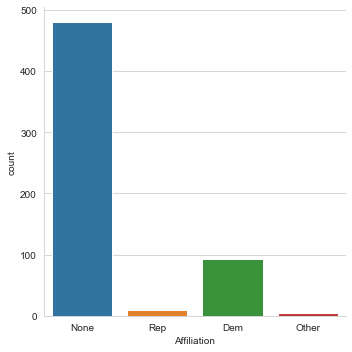

In [11]:
sns.catplot(x='Affiliation',kind='count',data=poll_df)

From the results, it is evident there is an overall neutrality but it is still leaning towards the Democratic Affiliation. We can investigate further by categorising the types of voters

### Measuring Affiliation Against Voter Types 

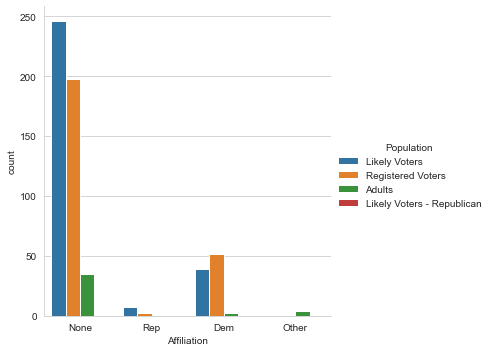

In [12]:
sns.catplot(x='Affiliation',kind='count',data=poll_df,hue='Population')

There is a high number of likely and registered voters hence the poll data should be an accurate enough reflection of the populations polled

### Calculating the Averages for Obama, Romney and the Undecided Polled People

<AxesSubplot:>

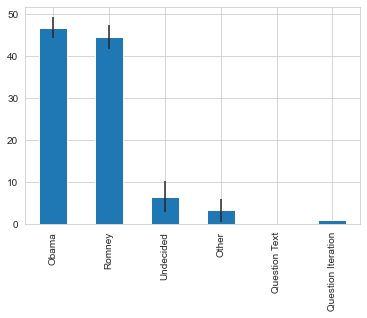

In [13]:
# First we have to retrieve the average
avg = pd.DataFrame(poll_df.mean(numeric_only=True)) 
avg.drop('Number of Observations',axis=0,inplace=True)

# And then get calculate the error
std = pd.DataFrame(poll_df.std(numeric_only=True))
std.drop('Number of Observations',axis=0,inplace=True)

# After, plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

Do ignore the last 3 columns as the script included all columns with numerical values. It is evident though that Obama and Romney have very close averages and are in a fairly close race

#### These values are now being represented in the table below

In [14]:
# Concatenate our Average and Std DataFrames
poll_avg = pd.concat([avg,std],axis=1)

#Rename columns
poll_avg.columns = ['Average','STD']

#Show
poll_avg[0:3]

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


### Time Series on Voter Sentiment Analysis

In [15]:
# Create timestamps
from datetime import datetime

The next step is to create another column with the difference between Romney and Obama in the polls

In [16]:
# Create a new column for the difference between the two candidates
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

# Preview the new column
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Given that the difference column is Obama minus Romney, a positive difference indicates a leaning towards Obama in the polls.

In [17]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1.0,0.09


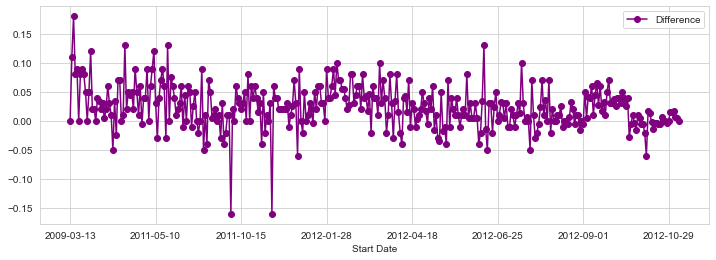

In [18]:
# Plotting the difference in polls between Obama and Romney
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

To further analyse this data, we can explore how the debates affected the polls. The dates were:
- Oct 3rd
- Oct 11
- Oct 22nd. 


We need to first identify the month of October and then plot the marker lines on the debate days

In [19]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Loop through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))

325
352


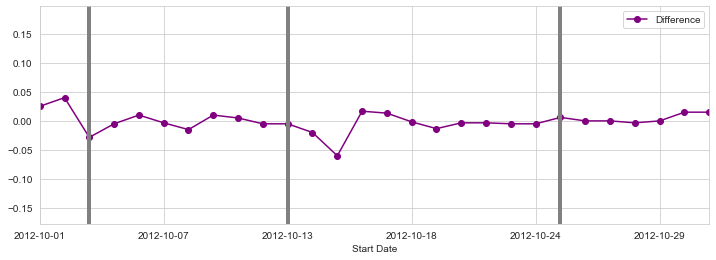

In [20]:
# Start with original figure
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

# Now add the debate markers
plt.axvline(x=325+2, linewidth=4, color='grey')
plt.axvline(x=325+10, linewidth=4, color='grey')
plt.axvline(x=325+21, linewidth=4, color='grey')

Interestingly, the polls reflect a dip for Obama after the second debate against Romney, even though he performed much worse against Romney during the first debate. There were definetely other factors that affected the outcome of the results such as geographical location.

## SECTION 2

This section analysis the size of donations and the demographics of the donors to analyse its effect on the results

In [73]:
# Set the DataFrame as the csv file
donor_df = pd.read_csv('Downloads/Election_Donor_Data.csv',low_memory=False)

In [74]:
# Get a quick overview
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [107]:
# let's also just take a glimpse
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


### Investigating the Donations Made

In [108]:
#Finding out the distinct amount of donations
donor_df['contb_receipt_amt'].value_counts()

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
            ...  
270.92          1
143.99          1
50.47           1
89.66           1
2408.79         1
Name: contb_receipt_amt, Length: 7326, dtype: int64

#### There are 8079 different types of donations

In [109]:
# Get the mean donation
don_mean = donor_df['contb_receipt_amt'].mean()

# Get the std of the donation
don_std = donor_df['contb_receipt_amt'].std()

print ('The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 312.19 with a std of 3764.48


#### The standard deviation is significantly huge, greater than the average by 12 times 

### Zoning in to Analyse the Top Donors

In [110]:
# Let's make a Series from the DataFrame, use .copy() to avoid view errors
top_donor = donor_df['contb_receipt_amt'].copy()

# Get rid of the negative values
top_donor = top_donor[top_donor > 0]

# Now sort it
top_donor.sort_values(ascending=False)

# Look at the top 10 most common donations value counts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

#### Out of curiosity we can investigate if donations are made in whole numbers

<AxesSubplot:>

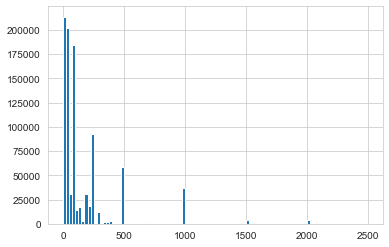

In [111]:
# Create a Series of the common donations limited to 2500
com_don = top_donor[top_donor < 2500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes.
com_don.hist(bins=100)

From the graph, the spikes are around whole numbers so this confirms our hypothesis

#### Finding the unique candidate names

In [112]:
# Grab the unique object from the candidate column
candidates = donor_df.cand_nm.unique()
#Show
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [113]:
# Separating the Democrat(Obama) from the Republican candidates using Dicitionary
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [114]:
# Clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt >0]

# Preview DataFrame
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


#### Calculating the amounts donated by each candidate

In [115]:
# Calculating the total amounts donated by each candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count().sort_values(ascending=False)

cand_nm
Obama, Barack                     589127
Paul, Ron                         143161
Romney, Mitt                      105155
Gingrich, Newt                     46883
Santorum, Rick                     46245
Cain, Herman                       20052
Bachmann, Michelle                 13082
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Huntsman, Jon                       4066
Pawlenty, Timothy                   3844
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Name: contb_receipt_amt, dtype: int64

Obama has the highest number of people donating towards his campaign. This could explain why he won

In [116]:
# Groupby candidate and then displayt the total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

<AxesSubplot:xlabel='cand_nm'>

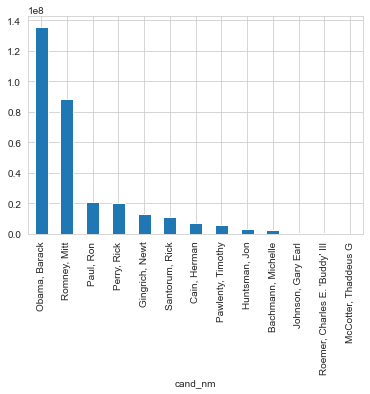

In [128]:
# Start by setting the groupby as an object
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)

# PLot out total donation amounts
cand_amount.plot(kind='bar')

Obama had the greatest donations and this is in sync with the previous graph where he had the highest number of donors 

#### Donations based on party types

<AxesSubplot:xlabel='Party'>

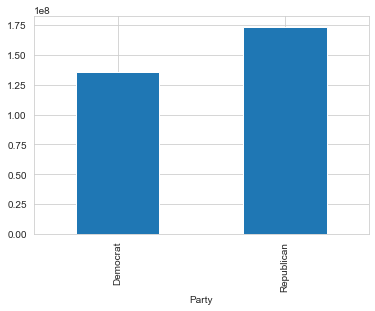

In [129]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Although Obama was had the largest donations per candidate, on a party basis, his donations outnumbered the Republican donations all together.

#### Investigating Donor Occupation

In [130]:
# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [131]:
# Check size
occupation_df.shape

(45067, 2)

This means there are 45,000+ different occcupations. We can set a cut-off point to investigate the most popular occupations.

In [132]:
 # Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

occupation_df.shape

(31, 2)

This number has reduced to 31, we can visualise this by plotting it.

<AxesSubplot:ylabel='contbr_occupation'>

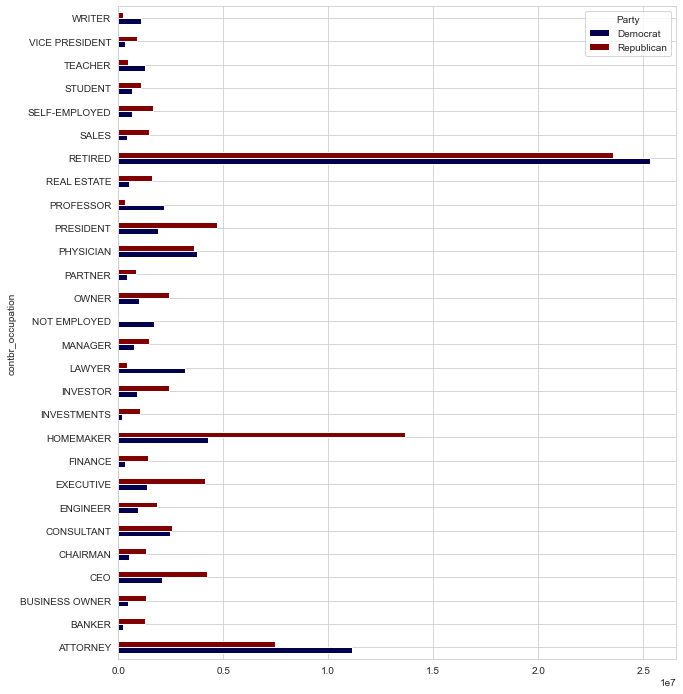

In [151]:
occupation_df

occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

There is some unavailable information so those columns have to be dropped

In [ ]:
 Drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

There is also CEO and C.E.O which we have to combine

In [135]:
# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

<AxesSubplot:ylabel='contbr_occupation'>

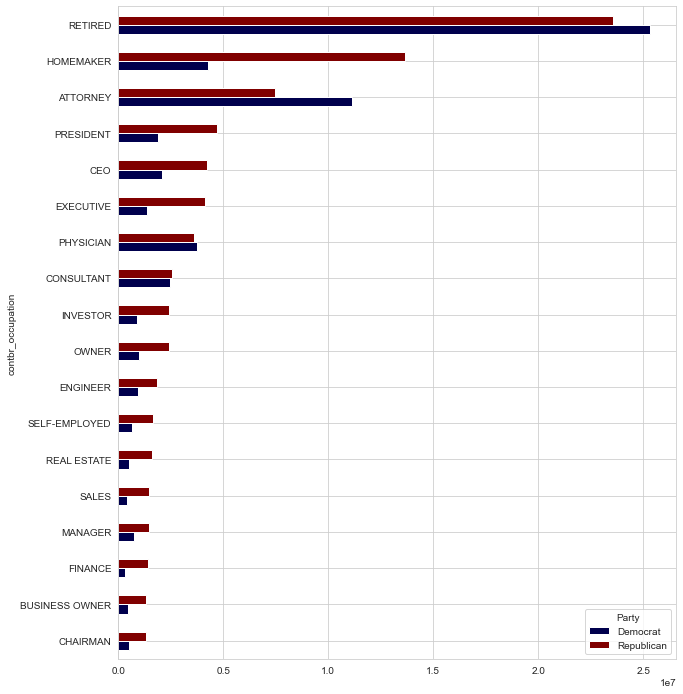

In [156]:
occupation_dff = occupation_df.sort_values('Republican')[10:]

# Display the top 10 occupations
occupation_dff.plot(kind='barh',figsize=(10,12),cmap='seismic')

The greatest contribution was by the Retired followed by Homemakers, the Attorney, the previous president and CEO who might be more conservative.

<AxesSubplot:ylabel='contbr_occupation'>

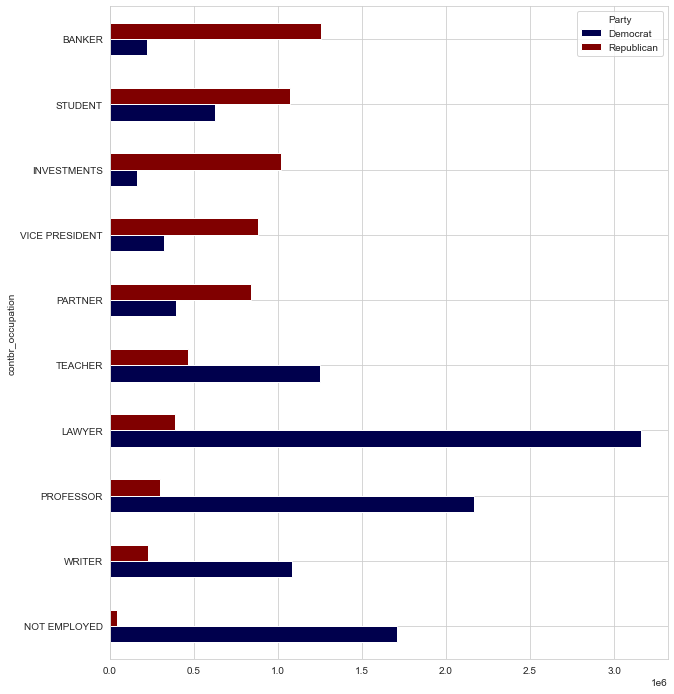

In [157]:
occupation_dfl = occupation_df.sort_values('Republican')[:10]

# Display the top 10 occupations
occupation_dfl.plot(kind='barh',figsize=(10,12),cmap='seismic')

The least contribution was by the unemployed.

This marks the end of the analysis, Obama won and this could be due to the large amount of donations and other factors which has not yet been investigated in this project. I hope you enjoyed this.